<a href="https://colab.research.google.com/github/tjdux/Introduction-to-Machine-Learning-with-Python/blob/main/02_3_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

/content/mglearn/datasets.py:31: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


## 01 예제에 사용할 데이터셋

### 1.1 분류

#### 1.1.1 forge 데이터셋

X.shape: (26, 2)


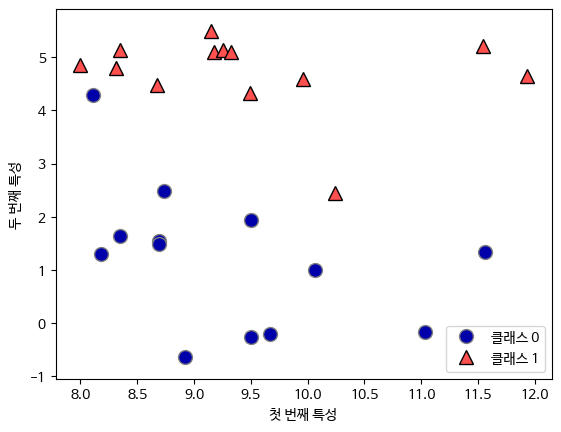

In [3]:
X, y = mglearn.datasets.make_forge()

# 산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print(f"X.shape: {X.shape}")

plt.show()

#### 1.1.2 위스콘신 유방암 데이터셋

In [4]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys():\n{cancer.keys()}")

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# 569개의 데이터 포인트, 30개의 특성
print(f"유방암 데이터의 형태:{cancer.data.shape}")

유방암 데이터의 형태:(569, 30)


In [6]:
# 212개는 악성, 357개는 양성
print(
    "클래스별 샘플 갯수:\n",
    {str(n): int(v) for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
)

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [7]:
# 각 특성의 의미
print(f"특성 이름\n: {cancer.feature_names}")

특성 이름
: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 1.2 회귀 알고리즘

#### 1.2.1 wave 데이터셋
- **특성이 적은 데이터셋 (저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터셋 (고차원 데이터셋)에서 그대로 유지되지 않을 수 있음**

Text(0, 0.5, '타깃')

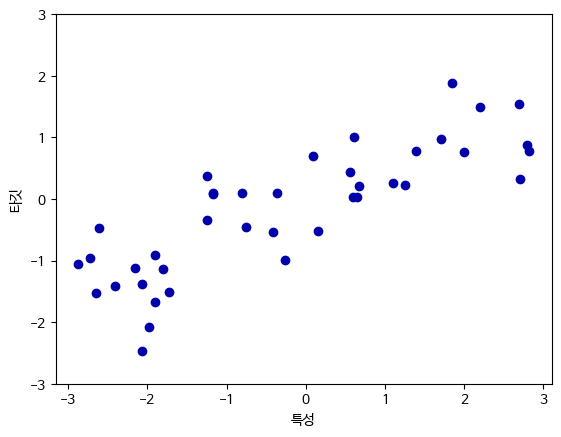

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

#### 1.2.2 보스턴 주택가격 데이터셋

In [9]:
# 데이터 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [10]:
# 506개의 데이터 포인트, 특성 13개
print(f"데이터의 형태: {data.shape}")

데이터의 형태: (506, 13)


In [11]:
# 특성 공학으로 유도된 데이터셋
X, y = mglearn.datasets.load_extended_boston()
print(f"X.shape: {X.shape}")

X.shape: (506, 104)


## 02 k-최근접 이웃
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음

### 2.1 k-최근접 이웃 분류

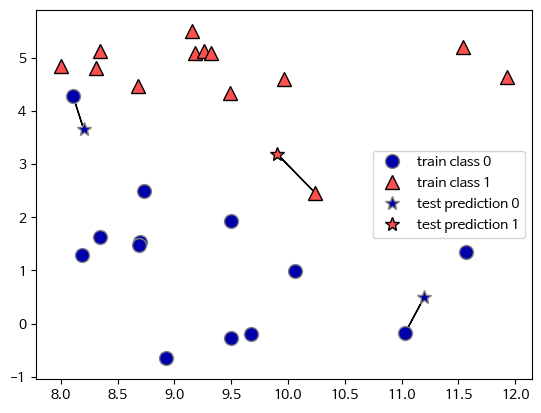

In [12]:
# 1-최근접 이웃 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

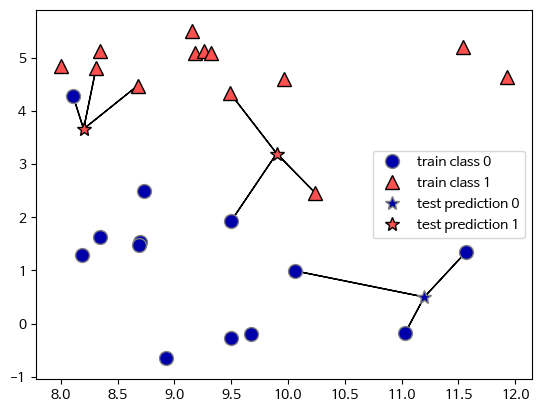

In [13]:
# k-최근접 이웃 분류: k-최근접 이웃 중 다수의 클래스가 레이블
# 3-최근접 이웃
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### scikit-learn에서의 k-최근접 이웃 분류

In [14]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# KNeighborsClassifier 객체 만들기 (이웃 수 3)
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# 학습 (예측할 때 이웃을 찾을 수 있도록 데이터를 저장)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# 예측: 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾음
print(f"테스트 세트 예측: {clf.predict(X_test)}")

테스트 세트 예측: [1 0 1 0 1 0 0]


In [18]:
# 정확도 평가
print(f"테스트 세트 정확도 : {round(clf.score(X_test, y_test), 2)}")

테스트 세트 정확도 : 0.86


### 2.2 KNeighborsClassfier 분석

- 2차원 데이터셋 ➡️ 모든 테스트 포인트의 예측을 xy 평면에 그릴 수 있음
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함
- ➡️ 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 **결정 경계** (decision boundary)를 볼 수 있음

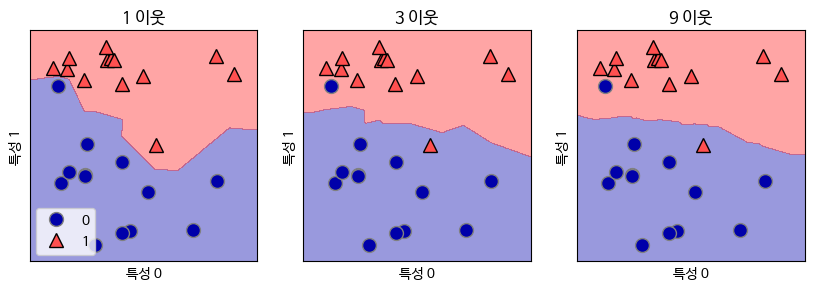

In [19]:
# 결정 경계

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit(): self 오브젝트 리턴 ➡️ 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f"{n_neighbors} 이웃")
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

axes[0].legend(loc=3)

- 이웃의 수를 늘릴수록 부드러운 결정 경계 ➡️ 단순한 모델
- 이웃⬇️ => 모델의 복잡도 ⬆️
- 이웃⬆️ => 모델의 복잡도 ⬇️
- 훈련 데이터 전체 개수를 이웃의 수로 지정하는 경우 => 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값

#### 복잡도와 일반화 사이의 관계

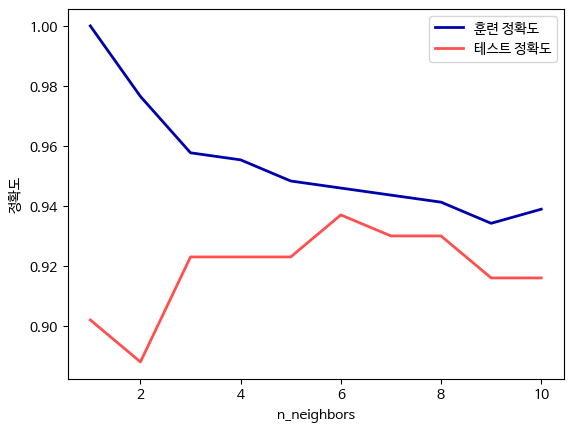

In [20]:
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

# 훈련 세트 정확도, 일반화 정확도 배열
training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors
neighbors_setting = range(1, 11)

for n_neighbors in neighbors_setting:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 그래프 그리기
plt.plot(neighbors_setting, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_setting, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


- 훈련 정확도
  - 최근접 이웃의 수가 하나일 때: 훈련 데이터에 대한 예측이 완벽
  - 이웃의 수가 늘어나면서 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦
- 테스트 정확도
  - 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음 ➡️ 1-최근접 이웃이 모델을 너무 복잡하게 만듦
  - 10-최근접 이웃은 모델이 너무 단순하여 정확도는 낮아짐
  - 정확도가 가장 좋을 때는 중간 정도인 6-최근접 이웃

### 2.3 k-최근접 이웃 회귀

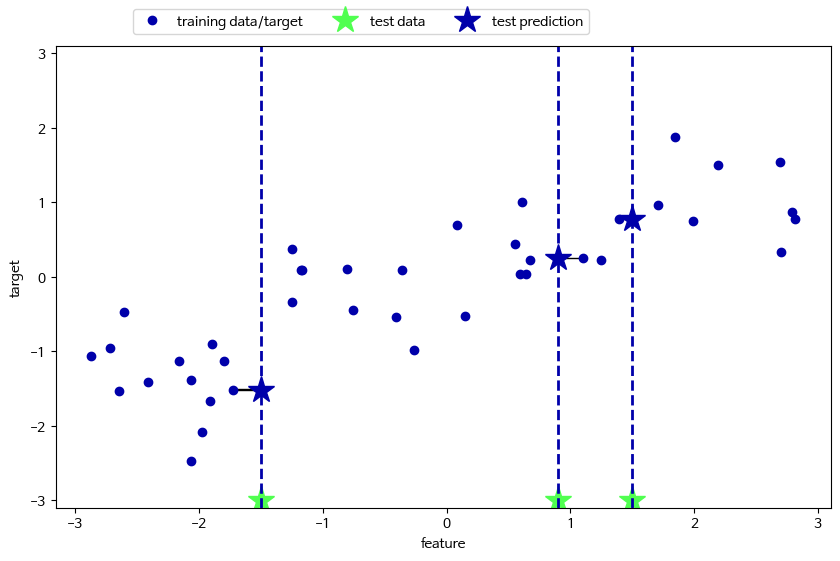

In [21]:
# 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃 값
mglearn.plots.plot_knn_regression(n_neighbors=1)

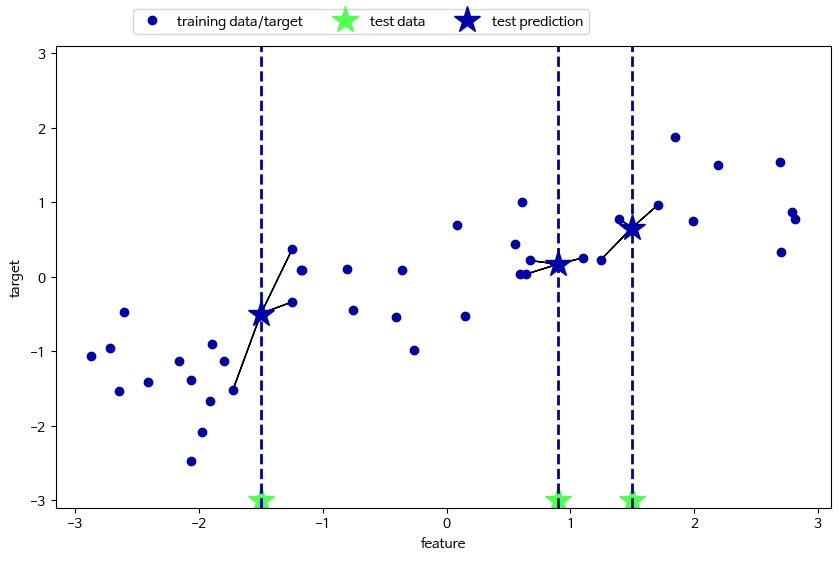

In [22]:
# k-최근접 이웃 회귀: 이웃 간의 평균이 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### scikit-learn에서의 k-최근접 이웃 회귀

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# 데이터 로드
X, y = mglearn.datasets.make_wave(n_samples=40)

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3-최근접 이웃 회귀 객체
reg = KNeighborsRegressor(n_neighbors=3)

# 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
# 예측
print(f"테스트 세트 예측:\n{reg.predict(X_test)}")

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


- `score()`: 회귀일 땐 $R^2$ (결정 계수) 값을 반환
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
  - 회귀 모델에서 예측의 적합도를 측정한 것
  - $ R^2 = 1 - \frac{모델의 오차}{평균만 썼을 때 오차}$
  - 모델이 아무것도 안 하고 그냥 모든 값을 평균으로 예측해도 설명되는 변동량 대비 모델이 얼마나 나은지를 측정
  - $y_i$: 실제 값
  - $\hat{y}_i$: 예측 값
  - $\bar{y}$: 실제 값의 평균
  - 0에서 1 사이의 값
    - 1: 예측이 완벽한 경우
    - 0: 훈련 세트의 출력값인 `y_train`의 평균으로만 예측하는 모델 ($\hat{y}_i = \bar{y}$)
  - 음수가 될 수 있음: 예측과 타깃이 상반된 경향을 가지는 경우


In [25]:
print(f"테스트 세트 R^2: {round(reg.score(X_test, y_test), 2)}")

테스트 세트 R^2: 0.83


### 2.4 KNeighborsRegressor 분석

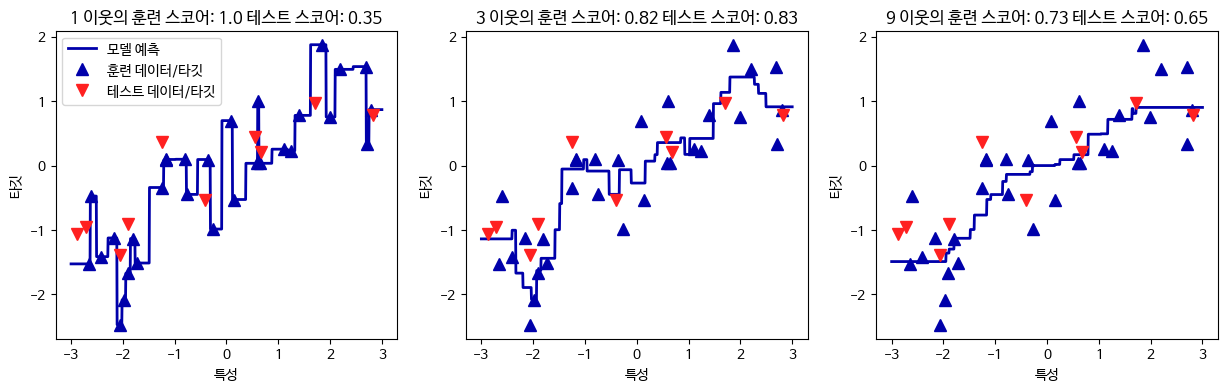

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3과 3 사이에 1,000 개의 데이터 포인트를 만듦
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(f"{n_neighbors} 이웃의 훈련 스코어: {round(reg.score(X_train, y_train), 2)} 테스트 스코어: {round(reg.score(X_test, y_test), 2)}")
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

### 2.5 장단점과 매개변수
#### 중요한 매개변수
- **데이터 포인트 사이의 거리를 재는 방법**
  - 기본적으로 유클리디안 거리 방식 사용
- **이웃의 수**
#### 장단점
- 장점
  - 이해하기 매우 쉬운 모델
  - 매우 빠르게 만들 수 있음
  - 많이 조정하지 않아도 자주 좋은 성능을 발휘
  - 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점
- 단점
  - 훈련 세트가 매우 크면 예측이 느려짐
  - 데이터 전처리 과정이 중요
  - 수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않음
  - 특성 값 대부분이 0인 (희소한) 데이터셋과는 잘 작동하지 않음 (대부분의 특성 값이 1이라 샘플들 간의 거리 차이가 미묘하거나 거의 동일해짐)
  - 예측이 느리고 많은 특성을 처리하는 능력이 부족하여 현업에서는 잘 쓰지 않음

## 03 선형 모델 (linear model)
- 입력 특성에 대한 **선형 함수**를 만들어 예측 수행

### 3.1 회귀의 선형 모델
$$\hat{y} = w[0]\times x[0] + w[1]\times x[1] + ... + w[p]\times x[p] + b$$
- $x[0], ...,x[p]$: 하나의 데이터 포인트에 대한 특성 (feature) (특성의 개수는 $p+1$)
- $\hat{y}$: 모델이 만들어낸 예측값
- 특성이 하나인 데이터셋이라면 $\hat{y} = w[0]\times x[0] + b$
- 특성이 많아지면 $w$는 각 특성에 해당하는 기울기를 모두 가짐
- 예측값 = 입력 특성에 $w$의 가중치(음수일 수도 있음)를 곱해서 더한 가중치 합

w[0]: 0.393906  b: -0.031804


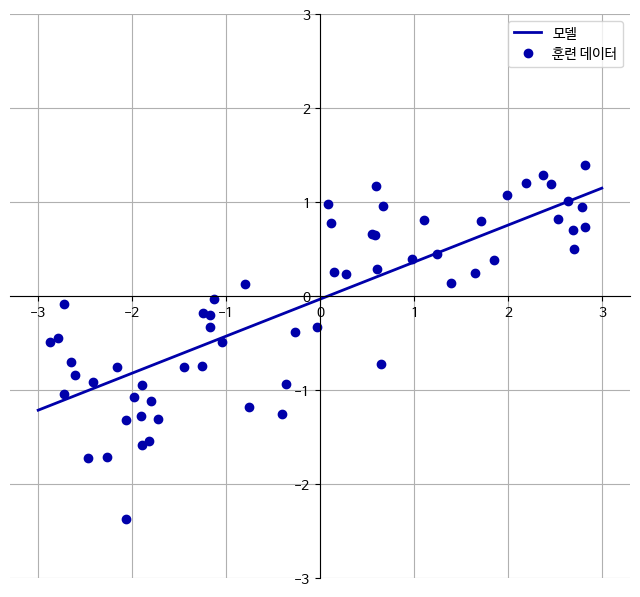

In [27]:
mglearn.plots.plot_linear_regression_wave()

- 선형 모델의 그래프: 특성이 하나일 땐 직선, 두 개 일 땐 평면이 되며, 더 높은 차원에서는 초평면 (hyperplane)
- `KNeighborsRegressor`보다 제약이 많아보이지만, 특성이 많은 데이터셋이라면 선형 모델은 훌륭한 성능을 낼 수 있음
- 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 $y$도 완벽하게 모델링 가능

### 3.2 선형 회귀(최소제곱법) (OLS)
- 예측과 훈련 세트에 있는 타깃 $y$ 사이의 **평균제곱오차** (mean squared error)를 최소화하는 파라미터 $w$와 $b$를 찾음
$$\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n}\bigl(y_i - \hat{y}_i\bigr)^2$$
  - 평균제곱오차 = (예측값과 타깃 값의 차이를 제곱하여 더함) / 샘플의 개수
- 장점: 매개변수가 없음
- 단점: 모델의 복잡도를 제어할 방법이 없음

In [28]:
from sklearn.linear_model import LinearRegression

# 데이터 로드
X, y = mglearn.datasets.make_wave(n_samples=60)

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 선형 회귀 모델 객체 생성, 학습
lr = LinearRegression().fit(X_train, y_train)

In [29]:
# w (기울기 파라미터): 가중치 또는 계수 (lr.coef_) numpy 배열
# b: 편향 또는 절편 (lr.intercept_) 항상 실수 값 하나

print(f"lr.coef_ (계수): {lr.coef_}")
print(f"lr.intercept_ (절편): {lr.intercept_}")

lr.coef_ (계수): [0.394]
lr.intercept_ (절편): -0.031804343026759746


In [30]:
# 성능 확인

print(f"훈련 세트 점수: {round(lr.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(lr.score(X_test, y_test), 2)}")

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


- 비슷한 훈련 세트와 테스트 세트의 점수 => 과소적합 상태
- 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없지만, 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져 과대적합 위험

#### 보스턴 주택가격 데이터셋 (고차원 데이터셋)

In [31]:
# 데이터 로드
X, y = mglearn.datasets.load_extended_boston()

# 훈련 데이터, 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 선형 회귀 모델 객체 생성, 학습
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print(f"훈련 세트 점수: {round(lr.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(lr.score(X_test, y_test), 2)}")

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


- 훈련 세트에서는 매우 정확한 예측
- 테스트 세트에서는 매우 낮은 $R^2$
- ➡️ 과대적합
- ➡️ 복잡도를 제어할 수 있는 모델을 사용해야 함

### 3.3 리지 회귀 (Ridge)
- 최소적합법에서 사용한 것과 같은 예측 함수를 사용
- **리지 회귀에서는 가중치 ($w$)의 절댓값을 가능한 한 작게 만들어 $w$의 모든 원소가 0에 가깝게 되기를 원함**
  - ➡️ 모든 특성이 출력에 주는 영향을 최소한으로 만듦 (기울기를 작게 만듦)
  - 이러한 제약을 **규제** (regularization)라고 함
  - **규제**: 과대적합이 되지 않도록 모델을 강제로 제한 (리지 회귀에서 사용하는 규제 방식은 L2 규제)

In [33]:
from sklearn.linear_model import Ridge

# 리지 회귀 모델 객체 생성, 학습
ridge = Ridge().fit(X_train, y_train)

# 정확도
print(f"훈련 세트 점수: {round(ridge.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(ridge.score(X_test, y_test), 2)}")

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높음
- ➡️ Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐 (모델의 복잡도가 낮아지면 훈련 세트에서 성능이 나빠지지만 더 일반화된 모델이 됨)
- 중요한 것은 테스트 세트에 대한 성능이기 때문에 LinearRegression보다는 Ridge를 선택

#### 규제(`alpha`)
- 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- `alpha` 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정 가능 (기본값 1.0)
- 높은 `alpha` 값 (제약이 많은 모델)은 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있음
- 아주 작은 `alpha` 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐

In [34]:
# 높은 alpha 값 (alpha = 10)

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(f"훈련 세트 점수: {round(ridge10.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(ridge10.score(X_test, y_test), 2)}")

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [35]:
# 낮은 alpha 값(alpha = 0.1)

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(f"훈련 세트 점수: {round(ridge01.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(ridge01.score(X_test, y_test), 2)}")

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


- 높은 `alpha` 값은 제약이 더 많은 모델 ➡️ 작은 `alpha` 값일 때보다 `coef_`의 절댓값의 크기가 작음

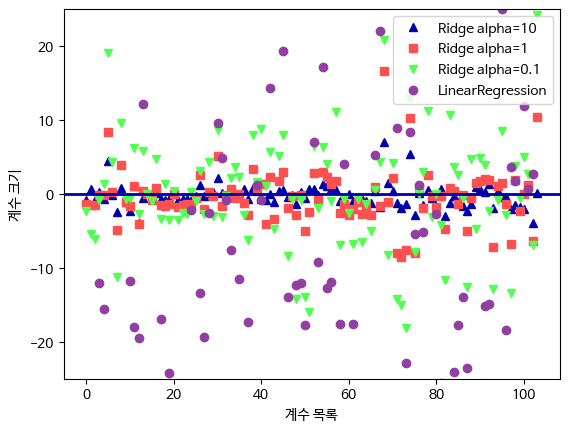

In [36]:
# 높은 alpha 값의 작은 계수의 절대값
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

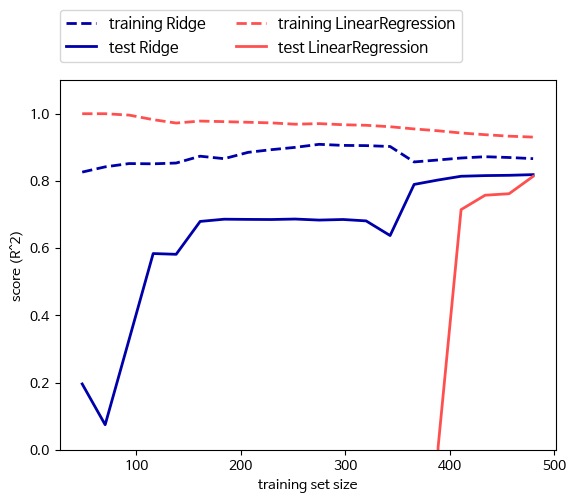

In [37]:
# 보스턴 주택가격 데이터셋에 대한 리지 회귀와 선형 회귀의 학습 곡선
# alpha 값을 고정하고 훈련 데이터의 크기를 변화

mglearn.plots.plot_ridge_n_samples()

- 모든 데이터셋에 대해 리지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음
- 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음
- 그러나 테스트 데이터에서는 리지의 점수가 더 높음 (특히 작은 데이터셋에서)
- 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡음
- ➡️ **데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 거의 같아질 수 있음**
- ➡️ **선형 회귀의 훈련 데이터 성능이 감소함** ⬅️ 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

### 3.4 라소 (Lasso)
- 계수를 0에 가깝게 만들려고 함
- **L1 규제** 를 사용
- ➡️ **L1 규제의 결과로 어떤 계수는 정말 0이 됨 (모델에서 완전히 제외되는 특성이 생김)**
- 특성 선택 (feature selection)이 자동으로 이뤄짐
- 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내줌

In [38]:
# 보스턴 주택가격 데이터 셋에 라소를 적용
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(f"훈련 세트 점수: {round(lasso.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(lasso.score(X_test, y_test), 2)}")
print(f"사용한 특성의 개수: {np.sum(lasso.coef_ != 0)}")

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


- 훈련 세트, 테스트 세트 모두에서 결과가 좋지 않음
- ➡️ 과소적합 (104개의 특성 중 4개만 사용)

#### 규제 (`alpha`)
- `alpha` 매개변수: 계수를 얼마나 강하게 0으로 보낼지를 조절

In [39]:
# 낮은 alpha 값
# max_iter (반복 실행하는 최대 횟수)의 기본값을 늘려야 함

lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)

print(f"훈련 세트 점수: {round(lasso001.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(lasso001.score(X_test, y_test), 2)}")
print(f"사용한 특성의 개수: {np.sum(lasso001.coef_ != 0)}")

훈련 세트 점수: 0.9
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


- 낮은 alpha 값
  - 모델의 복잡도 증가
  - 훈련 세트와 테스트 세트에서의 성능이 좋아짐
  - 104개의 특성 중 33개 만을 사용하여 모델을 분석하는데 쉬움
  - 너무 낮으면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해짐

In [40]:
# 너무 낮은 alpha 값 (과대적합)

lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)

print(f"훈련 세트 점수: {round(lasso00001.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(lasso00001.score(X_test, y_test), 2)}")
print(f"사용한 특성의 개수: {np.sum(lasso00001.coef_ != 0)}")

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


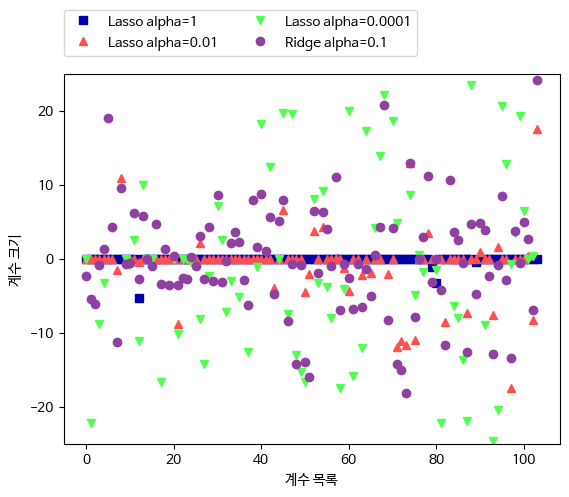

In [41]:
# 리지 회귀와 alpha 값이 다른 라소 회귀의 계수 비교

plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show()

- `alpha=1`: 계수 대부분이 0, 나머지 계수들도 크기가 작음
- `alpha=0.01`: 대부분의 특성이 0
- `alpha=0.0001`: 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델
- `alpha=0.1`인 Ridge 모델은 `alpha=0.01`인 라소 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않음

#### 리지 회귀, 라소 회귀
- 보통은 리지 회귀를 선호
- 하지만 특성이 많고 그 중 일부분만 중요하다면 라소 회귀가 더 좋은 선택일 수 있음
- 분석하기 쉬운 모델을 원한다면 Lasso가 더 쉽게 해석할 수 있는 모델을 만들어줄 것
- ElasticNet
  - Lasso와 Ridge의 패널티를 결합
  - 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야 함

#### QuantileRegressor
- 하나의 예측값이 아니라 예측의 백분위 간격을 구하는 데 사용
- `quantile` 매개변수에 예측하려는 백분위수를 0~1 사이로 지정, 기본값은 0.5로 중간값을 예측
- `alpha` 매개변수로 L1 규제를 조정
  - 기본값은 1.0
  - 커질수록 규제가 강해져 과소적합된 모델을 만듦

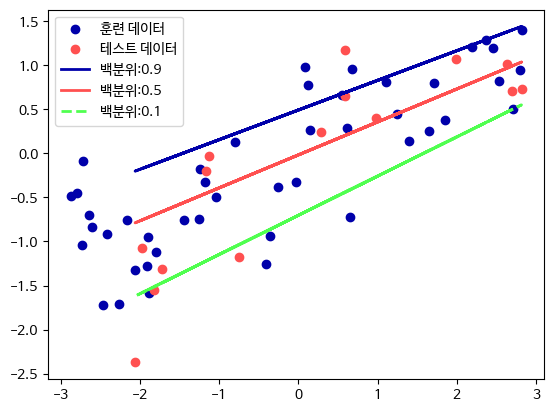

In [42]:
# 훈련 세트에서 학습한 90%, 50%, 10% 백분위 범위를 테스트 세트와 함께 출력
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_med= QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train).predict(X_test)

plt.scatter(X_train, y_train, label="훈련 데이터")
plt.scatter(X_test, y_test, label="테스트 데이터")
plt.plot(X_test, pred_up, label="백분위:0.9")
plt.plot(X_test, pred_med, label="백분위:0.5")
plt.plot(X_test, pred_low, label="백분위:0.1")
plt.legend()
plt.show()

### 3.5 분류용 선형 모델

#### 이진 분류 선형 모델 (LogsticRegression, Support Vector Machine)
$$\hat{y} = w[0]\times x[0] + w[1]\times x[1] + ... + w[p]\times x[p] + b > 0$$
- 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교
- 계산한 값이 0보다 작으면 클래스를 -1, 0보다 크면 +1로 예측
- **결정 경계**가 입력의 선형 함수 (이진 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기)
- 선형 모델을 학습시키는 알고리즘
  - 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
  - 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
- 많은 애플리케이션에서 첫 번째 항목 (**손실 함수**)에 대한 차이는 크게 중요하지 않음
- 널리 알려진 두 개의 선형 분류 알고리즘: **로지스틱 회귀** (logistic regression), **서포트 벡터 머신** (support vector machine)

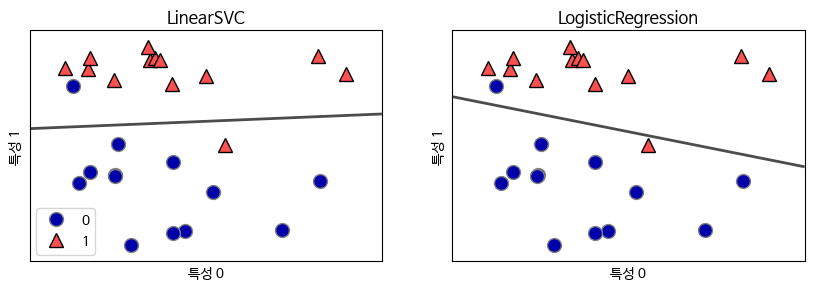

In [43]:
# LogisticRegression과 LinearSVC 모델들의 결정 경계
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend()

- 새로운 데이터가 직선 위쪽에 놓이면 클래스 1, 아래쪽에 놓이면 클래스 0으로 분류


##### 규제 (`C`)
- 두 모델은 기본적으로 L2 규제를 사용
- 매개변수 `C`: 규제의 강도를 결정
- 높은 `C`값
  - 규제가 감소 (⚠️ 릿지 회귀에서는 `alpha`값이 높을수록 규제 강도가 높아짐)
  - 훈련 세트에 가능한 최대로 맞추려고 함
  - 개개의 데이터 포인트를 정확히 분류하려고 노력함
- 낮은 `C`값
  - 계수 벡터(`w`)가 0에 가까워지도록 만듦
  - 데이터 포인트 중 다수에 맞추려고 함

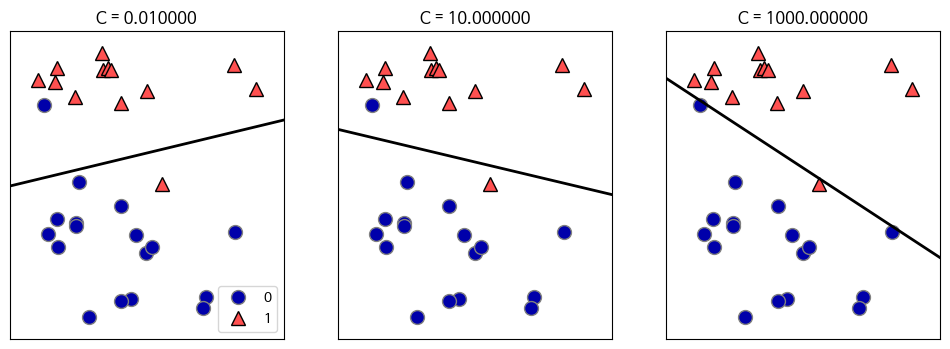

In [44]:
# C 값에 따른 LinearSVC

mglearn.plots.plot_linear_svc_regularization()

- `C=0.01`
  - 많은 규제가 적용
  - 비교적 수평에 가까운 결정 경계
- `C=10`
  - 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐
- `C=1000`
  - 결정 경계 더 기울어짐
  - 클래스 0의 모든 데이터 포인트를 올바르게 분류
  - 과대적합
- 고차원에서 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요

##### 유방암 데이터셋 (LogisticRegression)

In [45]:
# C=1 (기본값)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print(f"훈련 세트 점수: {round(logreg.score(X_train, y_train), 3)}")
print(f"테스트 세트 점수: {round(logreg.score(X_test, y_test), 3)}")

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


- 훈련 세트 점수와 테스트 세트 점수가 매우 비슷 ➡️ 과소적합

In [46]:
# C=100 (더 낮은 규제 강도)
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)

print(f"훈련 세트 점수: {round(logreg100.score(X_train, y_train), 3)}")
print(f"테스트 세트 점수: {round(logreg100.score(X_test, y_test), 3)}")

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 높아진 훈련 세트의 정확도와 테스트 세트의 정확도 ➡️ 복잡도가 높은 모델일수록 좋은 성능

In [47]:
# C=0.01 (더 높은 규제 강도)
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)

print(f"훈련 세트 점수: {round(logreg001.score(X_train, y_train), 3)}")
print(f"테스트 세트 점수: {round(logreg001.score(X_test, y_test), 3)}")

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


- 이미 과소적합된 모델에서 더 과소적합되므로 훈련 세트와 테스트 세트의 정확도는 기본 매개변수일 때보다 낮아짐

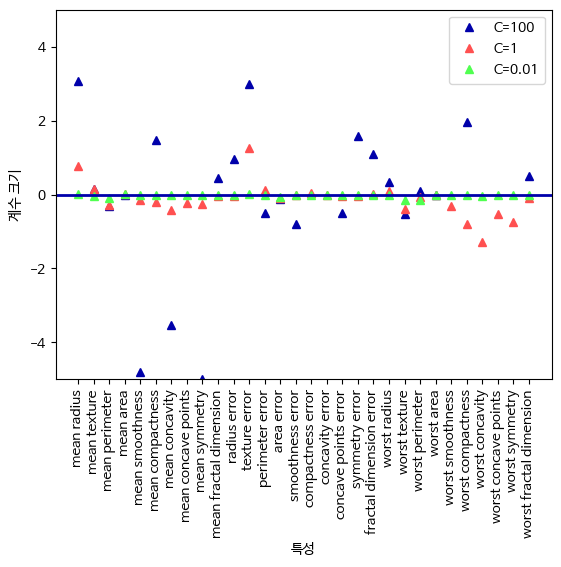

In [48]:
# C 값에 따른 모델의 계수
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg.coef_.T, "^", label="C=1")
plt.plot(logreg001.coef_.T, "^", label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

C=0.001인 L1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 L1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 L1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 L1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 L1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 L1 로지스틱 회귀의 테스트 정확도: 0.98


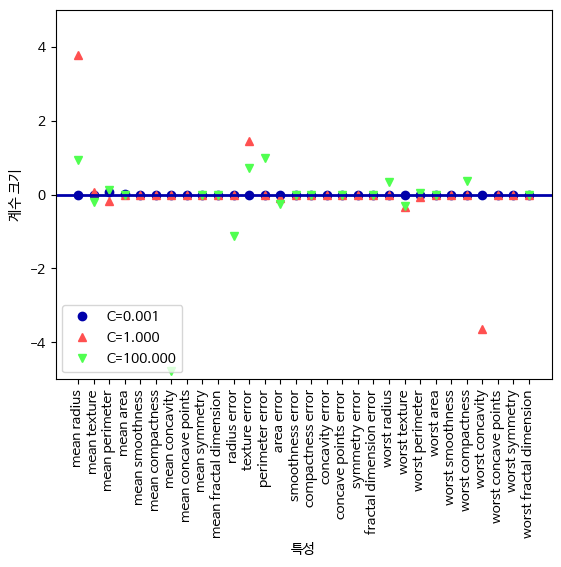

In [49]:
# L1 규제를 사용할 때의 분류 정확도와 계수 그래프
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  # penalty 매개변수: 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정
  lr_l1 = LogisticRegression(solver="liblinear", C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
  print(f"C={C:.3f}인 L1 로지스틱 회귀의 훈련 정확도: {round(lr_l1.score(X_train, y_train), 2)}")
  print(f"C={C:.3f}인 L1 로지스틱 회귀의 테스트 정확도: {round(lr_l1.score(X_test, y_test), 2)}")
  plt.plot(lr_l1.coef_.T, marker, label=f"C={C:.3f}")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

#### 다중 클래스 분류용 선형 모델
- 로지스틱 회귀를 제외한 선형 분류 모델은 이진 분류만을 지원
- **일대다 (one-vs.-rest) 방법**
  - 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법
  - 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습
  - 클래스의 수만큼 이진 분류 모델이 만들어짐
  - 예측을 할 때 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택
  - 클래스별 이진 분류기는 각 클래스가 계수 벡터 ($w$)와 절편($b$)을 하나씩 갖게 됨
  - 분류 신뢰도를 나타내는 $w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b$ 공식의 결과값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당



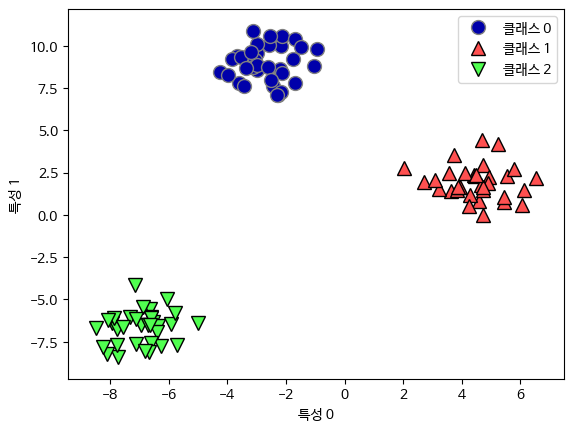

In [50]:
# 세 개의 클래스를 가진 데이터셋에 일대다 방식 적용
# 각 클래스의 데이터는 정규분포 (가우시안 분포)를 따름
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show()

In [51]:
# LinearSVC 분류기 훈련
linear_svm = LinearSVC().fit(X, y)
print(f"계수 배열의 크기: {linear_svm.coef_.shape}")
print(f"절편 배열의 크기: {linear_svm.intercept_.shape}")

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


- 계수 배열의 크기는 (3, 2)
  - 행: 세 개의 클래스에 각각 대응하는 계수 백터
  - 열: 각 특성에 따른 계수 값
- 절편: 각 클래스의 절편을 담은 1차원 벡터

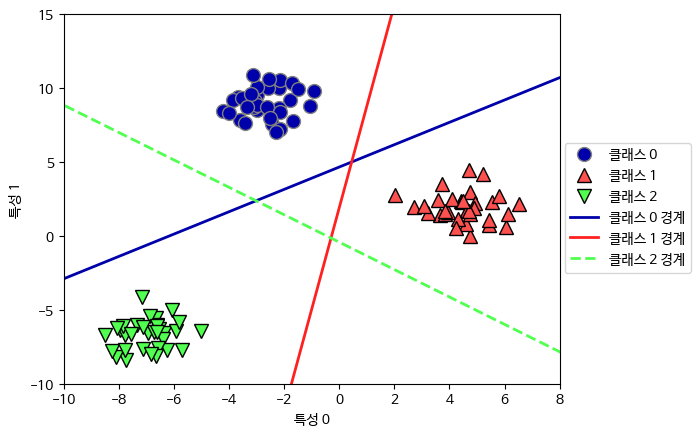

In [52]:
# 경계 시각화

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

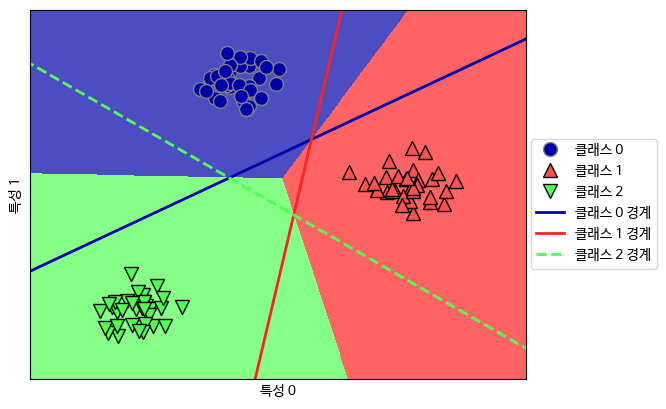

In [53]:
# 2차원 평면의 모든 포인트에 대한 예측
# 중앙의 삼각형: 분류 공식의 결과가 가장 높은 클래스 (가장 가까운 직선의 클래스) 로 분류

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 3.6 장단점과 매개변수
#### 매개변수
  - `alpha`, `C`
    - **`alpha` 값이 클수록, `C` 값이 작을수록 모델이 단순해짐**
    - 보통 `C`와 `alpha`는 로그 스케일로 최적치를 결정
  - L1 규제, L2 규제
    - 중요한 특성이 많지 않다고 생각하면 L1 규제 사용
    - 그렇지 않으면 기본적으로 L2 규제 사용
    - L1 규제는 몇 가지 특성만 사용하므로 모델의 해석이 쉬움
#### 장단점
  - 장점
    - 학습 속도가 빠르고 예측도 빠름
    - 매우 큰 데이터셋과 희소한 데이터셋에서 잘 작동
      - 대용량 데이터셋이라면 `solver="sag"`
      - 또는 대용량 데이터셋에 SDGClassifier와 SDGRegressotr를 사용
    - 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해 가능
      - 하지만 계수의 값들이 왜 그런지 명확하지 않을 경우가 있음 (데이터셋의 특성들이 서로 깊게 연관되어 있을 때)
    - 샘플에 비해 특성이 많을 때 잘 작동
    - 대용량 데이터셋에도 선형 모델을 많이 사용
  - 단점
    - 저차원 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음

### SDGClassfier, SDGregressor
- 확률적 경사 하강법 사용
  - 대용량 데이터에 사용 가능
  - 빠른 속도
  - 단점: 튜닝할 하이퍼파라미터가 많고 특성 스케일에 민감
- `loss` 매개변수: 최적화할 손실 함수를 지정
  - SDGClassifier의 기본값은 `hinge`: 서포트 벡터 머신 모델을 훈련
  - 'log_loss`: 로지스틱 회귀 모델을 훈련
  - SDGRegressor의 기본값은 `squared_error`: 릿지 모델을 훈련
- `penalty` 매개변수
  - `l1`, `l2`, `elasticnet`를 지정
  - 기본값: `l2`
- `alpha` 매개변수: 규제 강도
  - 기본값: 0.0001
  - 값이 클수록 규제 강도 높아짐
- `max_iter` 매개변수: 알고리즘 반복 횟수
  - 기본값: 1.000
- `early_stopping` 매개변수: 조기종료
- `learning_rate` 매개변수: 확률적 경사 하강법의 학습률 지정
  - 기본값 `optimal`: 반복횟수에 따라 비례적으로 감소
  - `constant`: `eta()` 매개변수에 지정한 값을 사용
  - `invscaling`: `eta()`에서 시작하여 지수적으로 감소


Text(0, 0.5, '특성 1')

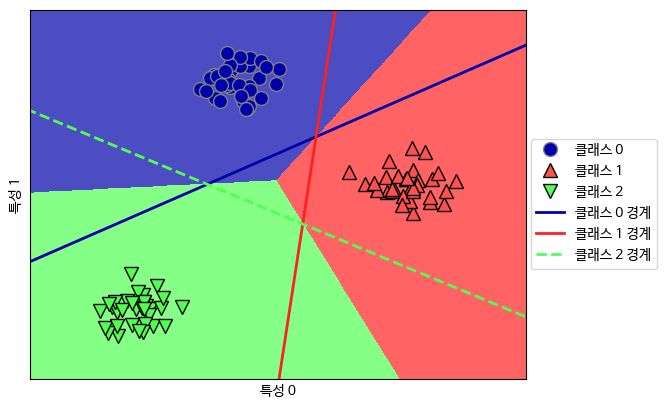

In [54]:
# SDGClassifier
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate="adaptive", eta0=0.1, random_state=42, n_jobs=1)
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line=np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [55]:
# SGDRegressor
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

sgd_r = SGDRegressor(learning_rate="adaptive", eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print(f"훈련 세트 점수: {round(sgd_r.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수: {round(sgd_r.score(X_test, y_test), 2)}")

훈련 세트 점수: 0.9
테스트 세트 점수: 0.82


## 04 나이브 베이즈 분류기
- 선형 모델과 매우 유사
- 선형 분류기 (LogisticRegression, LinearSVC)보다 훈련 속도가 빠르지만, 일반화 성능이 조금 낮음
- 특징: **각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합**
- 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 선택
- scikit-learn에 구현된 나이브 베이즈 분류기
  - `GaussianNB`
    - 연속적인 데이터에 사용
    - 클래스별로 각 특성의 분산과 평균을 저장
  - `BernoulliNB`
    - 이진 데이터(이산)에 사용
    - 대부분 텍스트 데이터를 분류할 때 사용
    - 각 클래스의 특성 중 0이 아닌 것의 개수 계산
    - 예측 공식은 선형 모델과 같은 형태 (그러나 `coef_`는 기울기 `w`가 아닌 특성 카운트 수를 로그 변환한 형태)
  - `MultinomialNB`
    - 카운트 데이터 (이산)에 사용
    - 대부분 텍스트 데이터를 분류할 때 사용
    - 클래스별로 특성의 평균을 계산
    - 예측 공식은 선형 모델과 같은 형태(그러나 `coef_`는 기울기 `w`가 아닌 특성 카운트 수를 로그 변환한 형태)

In [57]:
# BernoulliNB: 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈

# 이진 특성을 4개 가진 데이터 포인트 4개
# 클래스는 0과 1
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

# 출력 y가 0인 경우 (첫 번째, 세 번째 데이터 포인트)
  # 첫 번째 특성은 둘 다 0
  # 두 번째 특성은 0이 한 번, 1도 한 번
# 출력 y가 1인 경우 (두 번째, 네 번째 데이터 포인트)
  # 첫 번째 특성은 둘 다 1
  # 두 번째 특성도 둘 다 0
#...
y = np.array([0, 1, 0, 1])

# 클래스별로 0이 아닌 원소를 세는 과정
counts = {}
for label in np.unique(y):
  counts[label] = X[y == label].sum(axis=0)
print(f"특성 카운트:\n{counts}")

특성 카운트:
{np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


### 장단점과 매개변수
#### 매개변수
- `MultinomialNB`, `BernoulliNB`: 모델의 복잡도를 조절하는 `alpha` 매개변수
  - 모든 특성에 양의 값을 갖는 가상의 데이터 포인트를 `alpha` 개수만큼 추가
  - ➡️ 통계 데이터를 완만하게 만듦
  - 높은 `alpha` ➡️ 더 완만해지고 복잡도는 낮아짐
  - `alpha`에 따른 알고리즘 성능 변동은 비교적 크지 않음
#### 장단점
- `GaussianNB`: 매우 고차원인 데이터셋에 사용
- `MultinomialNB`, `BernoulliNB`: 희소한 데이터를 카운트하는 데 사용 (e.g. 텍스트)
  - `MultinomialNB`는 보통 0이 아닌 특성이 비교적 많은 데이터셋에서 `BernoulliNB`보다 높은 성능
- 장점
  - 빠른 훈련과 예측 속도
  - 이해하기 쉬운 훈련 과정
  - 희소한 고차원 데이터셋에서 잘 작동
  - 비교적 매개변수에 민간하지 않음